In [1]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union, make_pipeline, Pipeline

from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import TimeSeriesSplit

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from fenginering.function import *
from fenginering.indicator import *
from fenginering.transformer import *
from data.get_data import *

%load_ext autoreload
%autoreload 2

In [2]:
start = "2022"
end = "2023"
data = get_data('BTC', '1d').loc[start : end]
data.drop(columns = ['symbol'], inplace = True)
data.columns = data.columns.astype(str)
data.shape

(449, 5)

<Axes: >

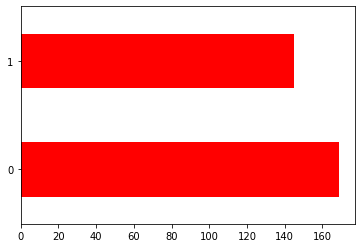

In [3]:

N = data.shape[0]
n = int(0.7*N)
train = data[:n]
test = data[n:]


target = get_classification_target(train)
features = train

target_test = get_classification_target(test)
features_test = test

target.value_counts().plot(kind = 'barh', color = 'red')

In [4]:
model = RandomForestClassifier()
model.fit(features, target)

RandomForestClassifier()

 Accuracy : 0.68 
 f1 : 0.63 
 precision : 0.72 
 recall : 0.55 
 AUC : 0.72 
              precision    recall  f1-score   support

           0       0.66      0.80      0.72        70
           1       0.72      0.55      0.63        65

    accuracy                           0.68       135
   macro avg       0.69      0.68      0.67       135
weighted avg       0.69      0.68      0.68       135



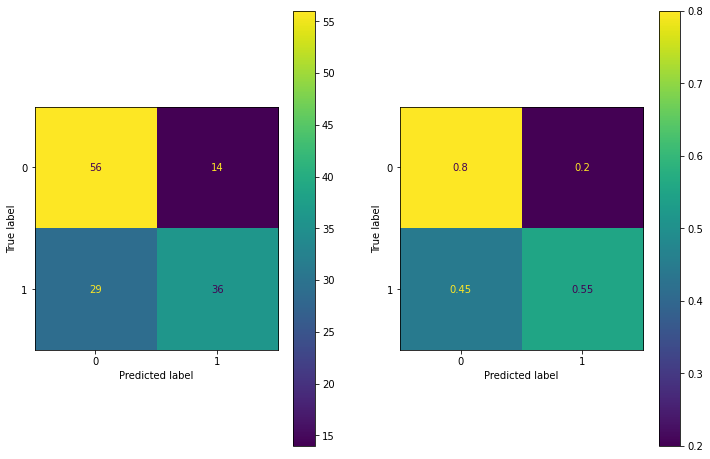

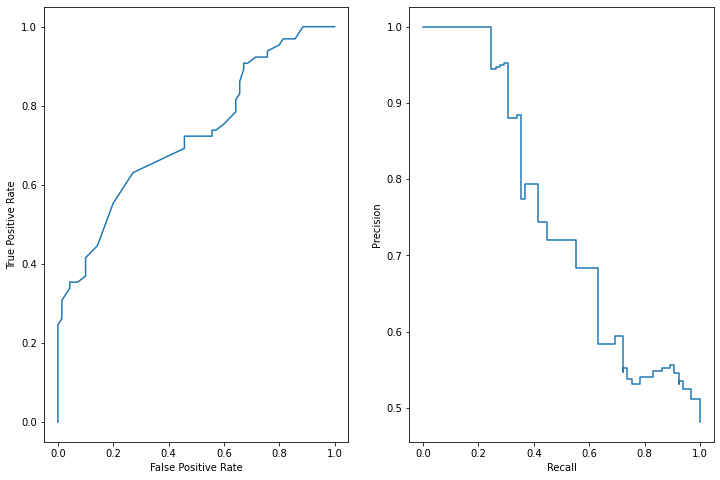

In [5]:
y_pred = model.predict(test)
y_pred_proba = model.predict_proba(test)

from evaluation.classification import *

evaluation = Evaluation(y_true = target_test, y_pred = y_pred, proba_pred = y_pred_proba[:,1])
evaluation.metrics()
evaluation.show()

<Axes: >

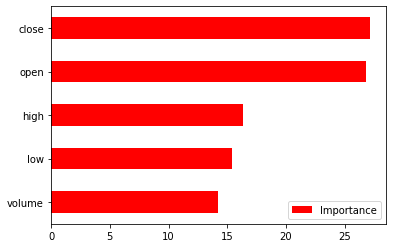

In [6]:
Importance = pd.DataFrame({'Importance' : model.feature_importances_*100},
                          index = model.feature_names_in_)
Importance.sort_values('Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')

## Add EMA et RSI

In [7]:
from sklearn.pipeline import FeatureUnion

In [8]:
start = "2022"
end = "2023"
data = get_data('BTC', '1d').loc[start : end]
data.drop(columns = ['symbol'], inplace = True)
data.columns = data.columns.astype(str)
data.shape

(449, 5)

In [11]:
ema_list = [3, 9, 15]
rsi_list = [10, 14, 20]

macd_dict = {
    'slow' : [10, 14],
    'fast' : [3, 5],
    'signal' : [2, 3]
}

sar_dict = {
    'step' : [0.2],
    'max_step' : [0.2]
}


m_i = MakeIndicator(data)
EMA = m_i.set_stransformer(ema, ema_list)
RSI = m_i.set_stransformer(rsi, rsi_list)
MACD = m_i.set_mtransformer(macd, macd_dict)
#SAR = m_i.set_mtransformer(sar, sar_dict)

pipe = m_i.pipeline()

pipe.fit_transform(data)

,ema_3_0,ema_9_1,ema_15_2,rsi_0,rsi_1,rsi_2,MACD_3_10_0,MACD_diff_3_10_0,MACD_sign_3_10_0,MACD_3_14_1,...,MACD_sign_5_10_4,MACD_5_14_5,MACD_diff_5_14_5,MACD_sign_5_14_5,MACD_5_10_6,MACD_diff_5_10_6,MACD_sign_5_10_6,MACD_5_14_7,MACD_diff_5_14_7,MACD_sign_5_14_7
19,41377.339439,42216.374605,42836.967596,24.386534,24.809960,24.707944,-942.731929,-134.225787,-808.506142,-1357.287237,...,-497.740149,-980.174452,-84.741750,-895.432702,-565.619144,-107.796576,-457.822569,-980.174452,-133.326762,-846.847690
20,38911.324719,41062.161684,42038.010397,13.173430,14.927279,16.039644,-2340.608218,-510.700692,-1829.907526,-2984.726400,...,-1010.709908,-1911.312970,-338.626756,-1572.686214,-1267.194788,-404.686110,-862.508679,-1911.312970,-532.232640,-1379.080330
21,36991.372360,39864.013348,41167.186597,11.300698,13.103922,14.323831,-3136.830953,-435.641142,-2701.189811,-3994.727943,...,-1524.395223,-2639.134870,-355.482885,-2283.651985,-1781.237880,-459.364601,-1321.873279,-2639.134870,-630.027270,-2009.107600
22,36617.961180,39140.120678,40551.857022,21.842162,21.878759,21.838955,-2804.123349,-34.311179,-2769.812169,-3735.932416,...,-1692.081234,-2707.733308,-141.360441,-2566.372867,-1775.924240,-227.025480,-1548.898760,-2707.733308,-349.312854,-2358.420454
23,36639.155590,38644.166542,40065.418645,25.336653,24.778145,24.315785,-2280.795388,163.005594,-2443.800982,-3222.265527,...,-1632.289824,-2543.864258,7.502870,-2551.367127,-1602.394119,-26.747680,-1575.646439,-2543.864258,-92.721902,-2451.142356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,27784.855237,26322.570826,25349.437731,71.876195,69.103865,66.651314,1666.595440,-54.784267,1721.379708,2310.252078,...,1198.909892,1830.662481,11.210811,1819.451670,1187.005843,3.419472,1183.586371,1830.662481,59.543765,1771.118715
445,27517.912618,26508.250660,25587.129265,64.268275,63.487918,62.463637,1193.705512,-175.891398,1369.596911,1806.460548,...,1041.609955,1575.715022,-81.245549,1656.960571,962.959987,-110.313192,1073.273179,1575.715022,-97.701847,1673.416869
446,27906.661309,26865.682528,25925.664357,68.759165,67.016304,65.271036,1224.053677,-48.514411,1272.568088,1850.681515,...,974.296938,1567.268267,-29.897435,1597.165702,940.640430,-66.316375,1006.956804,1567.268267,-53.074301,1620.342568
447,27680.565655,26983.440023,26116.765062,61.809373,61.834989,61.380240,857.619410,-138.316226,995.935636,1438.120499,...,820.793955,1324.543553,-90.874050,1415.417602,744.042463,-131.457170,875.499634,1324.543553,-147.899508,1472.443060


In [ ]:
model_1 = Pipeline(
    [
        ("features", pipe),
        ("random", RandomForestClassifier())
    ]
)
model_1

In [ ]:
model_1.fit(features, target[19:])

In [ ]:
model_1[-1].feature_names_in_

In [ ]:
def feature_importances(model):
    Importance = pd.DataFrame({'Importance' : model.feature_importances_*100},
                          index = model.feature_names_in_)
    Importance.sort_values('Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')


importances = model_1.named_steps['random']

In [ ]:
#model_1[:-1].feature_names_out

In [ ]:
"""
Indicators = FeatureUnion(
    [
        ("ema", EMA),
        ("rsi", RSI)
    ]
)

Indicators.fit_transform(data)
"""